# Qualifying results overview

Plot the qualifying result with visualization the fastest times.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import matplotlib as mpl

import fastf1
import fastf1.plotting
from fastf1.core import Laps

First, we need to get an array of all drivers.



In [8]:
# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']


After that we'll get each drivers fastest lap, create a new laps object
from these laps, sort them by lap time and have pandas reindex them to
number them nicely by starting position.



In [22]:
def plot_qualifying_delta_time_result(year, race):
    session = fastf1.get_session(year, race, 'Q')
    session.load()

    drivers = pd.unique(session.laps['Driver'])
    list_fastest_laps = list()
    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
    fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

    team_colors = list()
    for index, lap in fastest_laps.iterlaps():
        color = fastf1.plotting.team_color(lap['Team'])
        team_colors.append(color)

    fig, ax = plt.subplots()
    ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
            color=team_colors, edgecolor='white')
    ax.set_yticks(fastest_laps.index)
    ax.set_yticklabels(fastest_laps['Driver'])

    # show fastest at the top
    ax.invert_yaxis()

    # draw vertical lines behind the bars
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)

    lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

    plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
                f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

    plt.figure().set_size_inches(50000, 500000, forward=True)
    fig.set_dpi(1000)
    fig.set_facecolor("black")
    ax.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')
    
    plt.show()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']


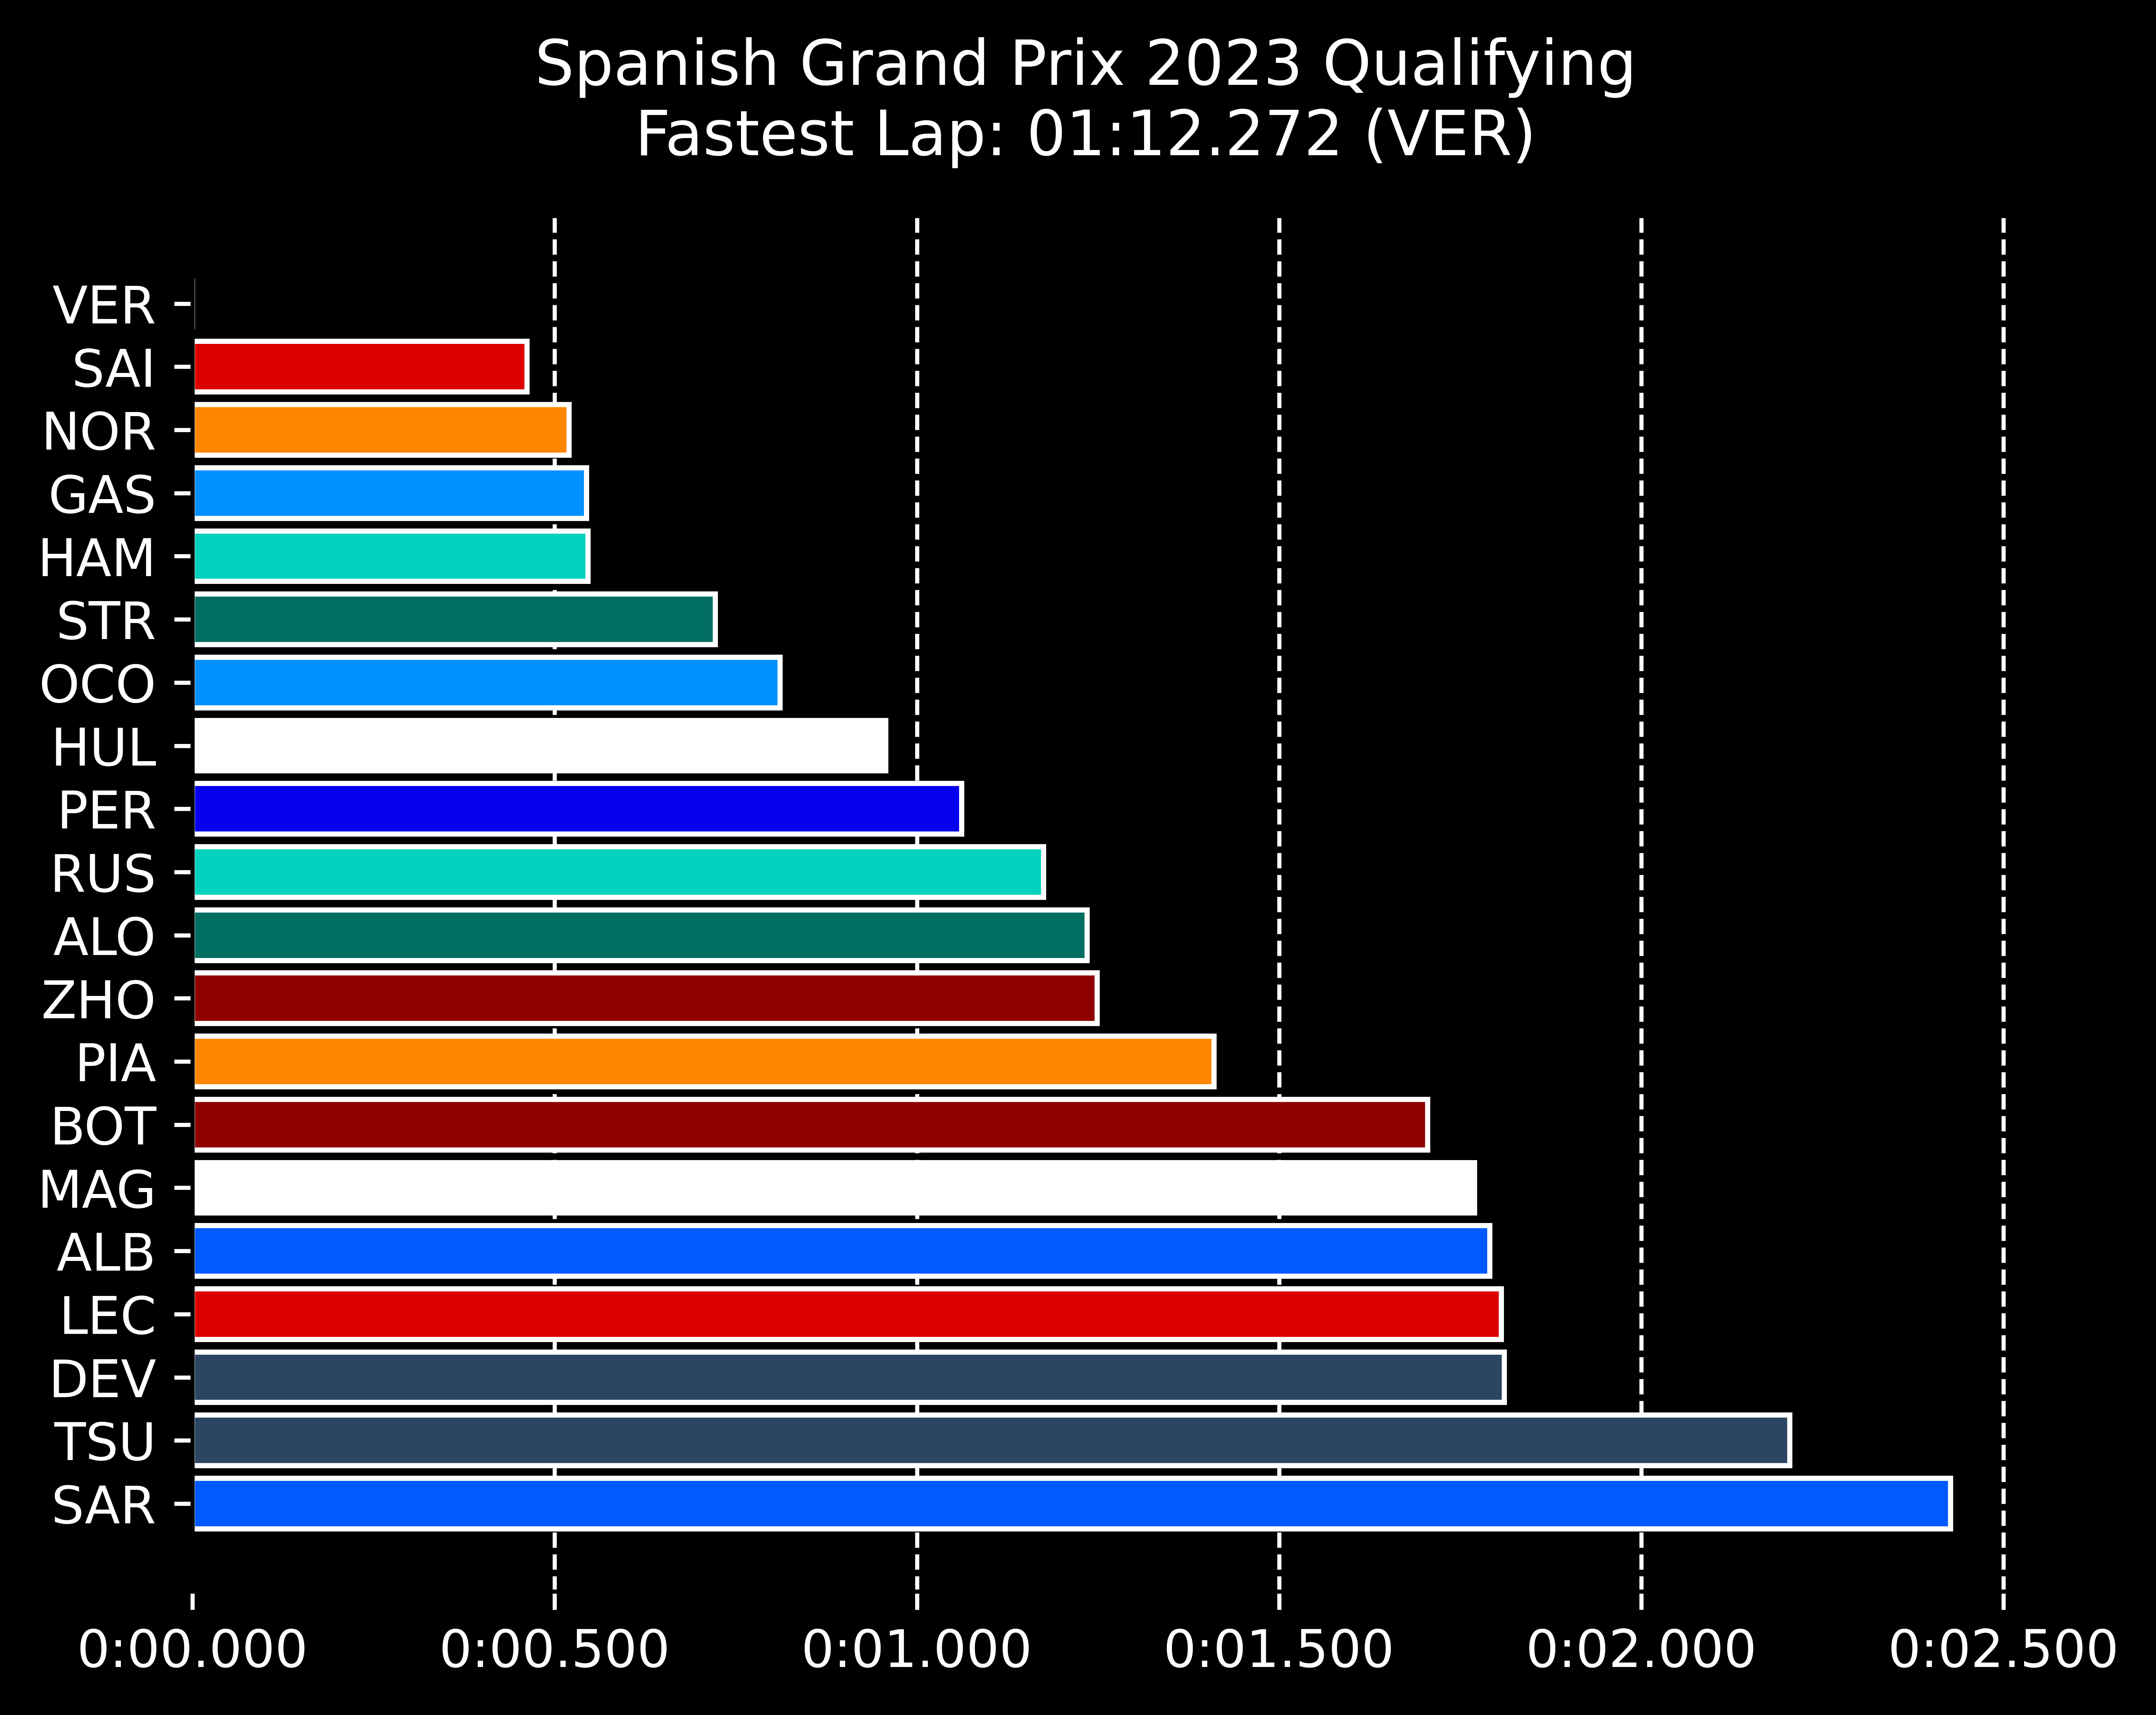

<Figure size 5e+06x5e+07 with 0 Axes>

In [24]:
plot_qualifying_delta_time_result(2023, "Spain")

The plot is nicer to look at and more easily understandable if we just plot
the time differences. Therefore we subtract the fastest lap time from all
other lap times.



We can take a quick look at the laps we have to check if everything
looks all right. For this, we'll just check the 'Driver', 'LapTime'
and 'LapTimeDelta' columns.



Finally, we'll create a list of team colors per lap to color our plot.



Now, we can plot all the data

